行列計算

In [ ]:
import numpy as np

In [ ]:
x = np.array([1,2])

In [ ]:
x

array([1, 2])

In [ ]:
w = np.array([[4,8],[6,3]])


In [ ]:
w

array([[4, 8],
       [6, 3]])

In [ ]:
x.dot(w)

array([16, 14])

In [ ]:
x = np.array([1,4,7])

In [ ]:
w = np.array([
    [2,8,7],
    [1,9,3],
    [6,4,0]])


In [ ]:
x.dot(w)

array([48, 72, 19])

In [ ]:
w = np.array([[4,5],
              [3,6]])

In [ ]:
w


array([[4, 5],
       [3, 6]])

In [ ]:
x = ([[7],
     [4]])

In [ ]:
x

[[7], [4]]

In [ ]:
w.dot(x)

array([[48],
       [45]])

In [ ]:
w = np.array([[3,5],[4,2]])

In [ ]:
x = np.array([[7],[8]])

In [ ]:
b = np.array([[1],[1]])

In [ ]:
w


array([[3, 5],
       [4, 2]])

In [ ]:
x

array([[7],
       [8]])

In [ ]:
b

array([[1],
       [1]])

In [ ]:
a = w.dot(x) + b

In [ ]:
a

array([[62],
       [45]])

シグモイド関数実装

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
np.exp(-1)

0.36787944117144233

In [ ]:
1/(1+np.exp(0))

0.5

In [ ]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a)) # return忘れないように


In [ ]:
sigmoid(77)

1.0

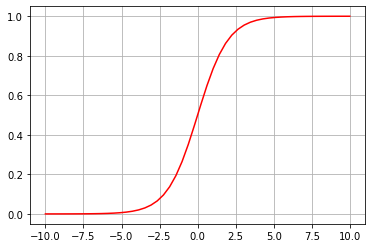

In [ ]:
import matplotlib.pyplot as plt

def sigmoi(x):
    #return 1 / (1 + np,exp(-x))
    return 1/(1+np.exp(-x))

x = np.linspace(-10, 10, 50)
y = sigmoi(x)

plt.clf() # 前に書いたグラフリセット
plt.plot(x,y, "r")
plt.grid(True)
plt.show()



シグマ計算実装

In [ ]:
y = np.array([1,2,3])

In [ ]:
np.sum(y)

6

誤差関数の実装

In [ ]:
def mean_squared_error(y,t): #mseでよい！！！
    return 0.5*np.sum((y-t)**2)
y = np.array([0.8,0.2])
t = np.array([1,0])
E = mean_squared_error(y,t)
E


0.039999999999999994

パラメータの更新実装

In [ ]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
def mse(y,t):
    return 0.5*(np.sum((y-t)**2))
w = np.array([[0.1]])
x = np.array([[3]])
t = np.array([[1]])

a = w.dot(x)
y = sigmoid(a)
E = mse(y,t)
y
E

0.09054958574879755

In [ ]:
def diff(y,t,a,x): #diffは微分の意味
    return ((y-t)*(1-sigmoid(a))*sigmoid(a)).dot(x.T) # y-1では？？？？　微分式をすべてかけてｗの傾きを出す
w = w-diff(y,t,a,x)
w


array([[0.41209319]])

In [ ]:
a = w.dot(x)
y = sigmoid(a)
E = mse(y,t)
y

array([[0.77491576]])

In [ ]:
for _ in range(200):
    w = w-diff(y,t,a,x)
    a = w.dot(x)
    y = sigmoid(a)
    E = mse(y,t)

In [ ]:
y


array([[0.98293004]])

In [ ]:
E

0.0001456917514284143

ディープラーニング実装

In [ ]:
import numpy as np

# シグモイド関数の定義
def sigmoid(a):
    return 1/(1+np.exp(-a))

# 一層目
x1 = np.array([[2], [3]])
w1 = np.array([[0.4, 0.3],[0.7, 0.6]])
a1 = w1.dot(x1)

# 二層目
x2 = sigmoid(a1)
w2 = np.array([[0.2, 0.3],[1, 0.7]])
a2 = w2.dot(x2)

# 出力層と正解値
y = sigmoid(a2)
t = np.array([[1],[0]])

# 入力値、パラメーター、合算値を配列化
X = [x1,x2]
A = [a1,a2]
W = [w1,w2]

# パラメーターが何層あるかのサイズの取得
max_layer = len(X)

# 活性化関数の微分
def f(a):
    return (1-sigmoid(a)) * sigmoid(a)

# 更新式の公式gの実装
def g(l, j):
    if max_layer == l:
        #print("outputf:",(y[j] - t[j]) * f(A[l-1][j]))
        return (y[j] - t[j]) * f(A[l-1][j])
    else:
        output = 0
        m = A[l].shape[0]
        #第一層のとき、a層目の要素数
        for i in range(m):
            output += g(l+1, i) * W[l][j, i] * f(A[l-1][j])
            #1層目のとき、g=2層目(1+1-1の配列番号のため）、w=2層目,f=1層目を処理                                             
            #print("output:",output)
        return output
    
# パラメーターwによる誤差関数の微分
def diff(j, k, l):
    return g(l, j)*X[l-1][k]

for _ in range(100):
    for l in range(len(X)):
        for j in range(W[l].shape[0]):
            for k in range(W[l].shape[1]):
                W[l][j, k] = W[l][j, k] - diff(j, k, l+1)
                #print("l=",l)
                #print("j=",j)
                #print("k=",k)
                #print(W[l][j, k])
    A[0] = W[0].dot(X[0])
    X[1] = sigmoid(A[0])
    A[1] = W[1].dot(X[1])
    y = sigmoid(A[1])
    #print(y) #更新結果
    


文字認識モデル(1と7を分類する）実装

In [ ]:
import numpy as np

# シグモイド関数の定義
def sigmoid(a):
    return 1/(1+np.exp(-a))

# 活性化関数の微分
def f(a):
    return (1-sigmoid(a)) * sigmoid(a)

# 更新式の公式gの実装
def g(l, j):
    if max_layer == l:
        return (y[j] - t[j]) * f(A[l-1][j])
    else:
        output = 0
        m = A[l].shape[0]
        for i in range(m):
            output += g(l+1, i) * W[l][i, j] * f(A[l-1][j])
        return output
    
# パラメーターwによる誤差関数の微分
def diff_w(j, k, l):
    return g(l, j)*X[l-1][k]

# パラメーターbによる誤差関数の微分
def diff_b(j, l):
    return g(l, j)

# Wの定義
w1 = np.random.normal(0.0, 1.0, (10, 784))
#正規分布に従う乱数を生成する関数 出力数,入力数で指定（ｘが784行×1列のため）
w2 = np.random.normal(0.0, 1.0, (2, 10))
W = [w1, w2]

# Bの定義
b1 = np.ones((10, 1))
b2 = np.ones((2, 1))
B = [b1, b2]

#13007個中のデータから前100件を読み込む
xs = np.load('inputs.npy')[0:101]
ts = np.load('true_values.npy')[0:101]
#print("xs:",xs)
#print("ts:",ts)

#npyファイルは同じところにいれる
#x,tを一緒にループさせる
for x, t in zip(xs, ts):
# zipはxsとtsに入ってる要素数分だけループ
    # 一層目
    x1 = x.flatten().reshape(784, 1)
    # flattenで一次配列にしてからreshape
    a1 = W[0].dot(x1) + b1

    # 二層目
    x2 = sigmoid(a1)
    a2 = W[1].dot(x2) + b2

    # 出力値と正解値
    y = sigmoid(a2)
    if np.argmax(y) == np.argmax(t):
        print("正解")
    else:
        print("不正解")
    #argmaxという関数は、リストの中で一番大きい値が入っている インデックス番号を教える

    # パラメーター使用のためにx,aをリスト化
    X = [x1,x2]
    A = [a1,a2]

    # パラメーターが何層あるかのサイズの取得
    max_layer = len(X)

    # パラメーターw,bの更新
    for l in range(len(X)):
        for j in range(W[l].shape[0]):
            for k in range(W[l].shape[1]):
                W[l][j, k] = W[l][j, k] - diff_w(j, k, l+1)
            B[l][j] = B[l][j] - diff_b(j, l+1)
np.save("w1.npy",W[0])
np.save("w2.npy",W[1])
np.save("b1.npy",B[0])
np.save("b2.npy",B[1])
#saveはnpy形式で配列を保存します。

正解
正解
正解
正解
不正解
正解
正解
不正解
不正解
正解
正解
不正解
不正解
正解
正解
不正解
正解
正解
正解
正解
不正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
不正解
正解
正解
正解
正解
正解
不正解
正解
正解
正解
正解
正解
正解
正解
正解
不正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
不正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解
正解


学習モデルの実行

In [ ]:
import numpy as np
import random

for i in range(100):
    index = random.randint(0, 13007)
    x1 = np.load('inputs.npy')[index].flatten().reshape(784, 1)
    w1 = np.load('w1.npy')
    w2 = np.load('w2.npy')
    b1 = np.load('b1.npy')
    b2 = np.load('b2.npy')

    
    a1 = w1.dot(x1) + b1
    x2 = sigmoid(a1)
    a2 = w2.dot(x2) + b2

    # 出力値と正解値
    y = sigmoid(a2)
    print(y)
    t= np.load('true_values.npy')[index]
    print(t)
    if np.argmax(y) == np.argmax(t):
        print("正解")
    else:
        print("不正解")
    

[[0.02602022]
 [0.91058664]]
[0 1]
正解
[[0.36820117]
 [0.46404086]]
[1 0]
不正解
[[0.09895295]
 [0.80746485]]
[0 1]
正解
[[0.84280268]
 [0.13150098]]
[1 0]
正解
[[0.95105726]
 [0.0633514 ]]
[1 0]
正解
[[0.84483207]
 [0.12737873]]
[1 0]
正解
[[0.19997214]
 [0.91937023]]
[0 1]
正解
[[0.01180304]
 [0.945092  ]]
[0 1]
正解
[[0.16623832]
 [0.75763354]]
[0 1]
正解
[[0.7987896]
 [0.0749107]]
[1 0]
正解
[[0.88861208]
 [0.10851393]]
[1 0]
正解
[[0.00490978]
 [0.97371884]]
[0 1]
正解
[[0.01439151]
 [0.83402911]]
[0 1]
正解
[[0.93630962]
 [0.05772254]]
[1 0]
正解
[[0.02546889]
 [0.91200096]]
[0 1]
正解
[[0.14649366]
 [0.5329865 ]]
[0 1]
正解
[[0.16357192]
 [0.76798041]]
[0 1]
正解
[[0.03967455]
 [0.9114718 ]]
[0 1]
正解
[[0.02823088]
 [0.87088555]]
[0 1]
正解
[[0.91370911]
 [0.11067852]]
[1 0]
正解
[[0.8886056 ]
 [0.10848978]]
[1 0]
正解
[[0.49973618]
 [0.57010214]]
[0 1]
正解
[[0.10644944]
 [0.81438942]]
[0 1]
正解
[[0.27386081]
 [0.61744464]]
[1 0]
不正解
[[0.78543978]
 [0.23326877]]
[1 0]
正解
[[0.29326219]
 [0.54249818]]
[0 1]
正解
[[0.94880874

google colaboratoryにてgoogleドライブのファイルにアクセス許可

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


kerasを用いてニューラルネットワーク実装(google colaboratoryで実施）

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# 1: 入力データと正解値を取得
xs = np.load('/content/drive/My Drive/dlpractice/inputs.npy')
ts = np.load('/content/drive/My Drive/dlpractice/true_values.npy')



# 2: モデルを構築するために必要な情報を格納
model = Sequential()
model.add(Dense(units=10, input_shape=xs[0].shape))
model.add(Activation('sigmoid'))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))


# 3: モデルの構築
model.compile(loss='mean_squared_error',
              optimizer='SGD')

# 4: 構築したモデルに入力値と正解値を渡し、パラメーターの学習開始
model.fit(xs, ts, batch_size=1, verbose=1)

# 5: 学習結果の保存
json_string = model.to_json()
open('/content/drive/My Drive/dlpractice/model.json', 'w').write(json_string)
model.save_weights('/content/drive/My Drive/dlpractice/model.h5')



13007/13007 [==============================] - 16s 1ms/step - loss: 0.0419


学習モデル実行

In [3]:
import numpy as np
from keras.models import model_from_json

# 1:構築したモデル情報の取得
model = model_from_json(open('/content/drive/My Drive/dlpractice/model.json').read())
model.load_weights('/content/drive/My Drive/dlpractice/model.h5')

# 2:テストデータの所得
xs = np.load("/content/drive/My Drive/dlpractice/inputs_for_validation.npy")
ts = np.load("/content/drive/My Drive/dlpractice/true_values_for_validation.npy")

# 3:予測に正解した数を保存する変数
accuracy_count = 0

# 4:モデルの精度判定
for x,t in zip(xs, ts):
  y = np.argmax(model.predict(x.reshape(1,784)), axis= -1)
  if y == t:
    accuracy_count += 1

# 5:モデルの精度の結果を出力
print("予測精度", accuracy_count / xs.shape[0])

予測精度 0.9865926953305594
